In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import seaborn as sns
import sympy
from sympy import Symbol
from sympy import *
import matplotlib as mat
from matplotlib import font_manager
plt.rc('font', family='DejaVu Sans')

# 1. Random Walks¶
* https://ko.wikipedia.org/wiki/%EB%AC%B4%EC%9E%91%EC%9C%84_%ED%96%89%EB%B3%B4

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

Text(0, 0.5, 'Positon')

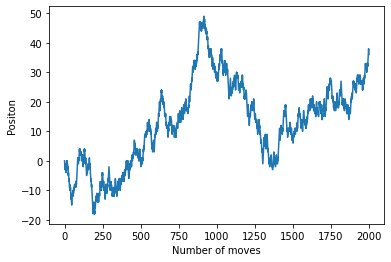

In [2]:
N = 1 # number of random walks
T = 2000 # time span

position = np.zeros((N, T+1))

for i in range (0, N):
    for t in range(1, T+1):
        random = np.random.random()
        if random > 0.5:
            position[i][t] = position[i][t-1] + 1
        elif random < 0.5:
            position[i][t] = position[i][t-1] - 1

plt.plot(position[i])
plt.xlabel("Number of moves")
plt.ylabel("Positon")

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
 
N = 10000 # number of random walks
T = 5000  # time span
I = []  # random walkers final position

position = np.zeros((N, T+1))

for i in range (0, N):
    for t in range(1, T+1):
        random = np.random.random()
        if random > 0.5:
            position[i][t] = position[i][t-1] + 1
        elif random < 0.5:
            position[i][t] = position[i][t-1] - 1
    I.append(position[i][T])

C:\Users\bbang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bbang\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

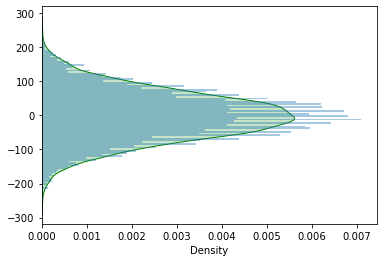

In [19]:
sns.distplot(I,bins=100,kde=True,kde_kws={"color":"g","alpha":0.22,"linewidth":1,"shade":True},vertical=True)

In [22]:
np.mean(I),np.std(I),np.median(I)

(-0.7256, 70.07214499813745, -2.0)

# 2. Bifurcation
다음으로 주어지는 미분방정식이 있다.
$$ \frac{dx}{dt}=rx-x^2$$

(a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)
1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

In [23]:
r, x, t = sympy.symbols('r,x,t')
x = Function('x')
x, x(t).diff(t)

(x, Derivative(x(t), t))

In [24]:
r = -1
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2),ics= {x(0):2})

Eq(x(t), -2/(3*(2/3 - exp(t))))

In [25]:
r = -1
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2),ics= {x(0):-2})

Eq(x(t), -2/(2 - exp(t)))

In [26]:
r = 1
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2),ics= {x(0):2})

Eq(x(t), 1/(1 - exp(-t)/2))

In [27]:
r = -1
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2),ics= {x(0):2})

Eq(x(t), -2/(3*(2/3 - exp(t))))

(b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.
$$0=rx-x^2=x(r-x)$$
1. r=-1
2. r=1

In [28]:
x, r = sympy.symbols('x, r')

In [29]:
r = -1
eq = x*(r-x)
solve((eq),dict=True)

[{x: -1}, {x: 0}]

In [30]:
r = 1
eq = x*(r-x)
solve((eq),dict=True)

[{x: 0}, {x: 1}]